In [1279]:
import os
import numpy as nm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import seaborn as sns
color_pal = sns.color_palette
#import pd.read_csv
os.getcwd()
import numpy as np
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score 
from sklearn.utils import resample
import tensorflow.keras
import tensorflow as tf
from tensorflow.keras.models import load_model
#model = load_model('trained_model.h5')
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, LSTM

In [1289]:
d_parser = lambda x: pd.datetime.strptime(x,'%m/%d/%y''%m/%d/%y')
liora = pd.read_csv('/Users/davidpegoli/Desktop/weekly-sales-Liora-Baltimore-2022_12_01-2022_12_31.csv')
date_parser=lambda x:datetime_strptime(x,'%m/%d/%y''%m/%d/%y')
liora =liora.drop([0,5,6,7])
liora
#liora = liora.set_index('week')
#liora.index = pd.to_datetime(liora.index)


,Week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Week Total
1,12/5/22 - 12/11/22,81.0,0.0,"1,771.85","1,066.80","2,949.55","5,864.90","2,703.00","14,437.10"
2,12/12/22 - 12/18/22,0.0,0.0,"2,064.17",623.00,"3,131.00","3,596.00","2,293.00","11,707.17"
3,12/19/22 - 12/25/22,0.0,0.0,"2,072.00","2,598.60","2,566.20","3,012.10",103.00,"10,351.90"
4,12/26/22 - 1/1/23,0.0,0.0,"2,357.25","2,522.23","3,353.35","6,113.15",0.00,"14,345.98"


In [1291]:
liora1=liora
#liora["Week"] = pd.to_datetime(liora["Week"], format='%m/%d/%y %m/%d/%y')
#
print(liora1['Week'].dtype)

object


In [1292]:
liora1["Week"] = liora1["Week"].str.split(' ').str[0]
liora1["Week"] = pd.to_datetime(liora1["Week"], format='%m/%d/%y')

In [1293]:
liora['Wednesday']=liora['Wednesday'].str.replace('[\$\,]','',regex=True).astype(float)

In [1298]:
liora.dtypes

Week          datetime64[ns]
Monday               float64
Tuesday              float64
Wednesday            float64
Thursday             float64
Friday               float64
Saturday             float64
Sunday               float64
Week Total           float64
dtype: object

In [1295]:
liora[['Thursday','Friday','Saturday','Sunday','Week Total']]=liora[['Thursday','Friday','Saturday','Sunday','Week Total']].replace('[\$\,]','',regex=True).astype(float)

In [1296]:
liora.dtypes

Week          datetime64[ns]
Monday               float64
Tuesday              float64
Wednesday            float64
Thursday             float64
Friday               float64
Saturday             float64
Sunday               float64
Week Total           float64
dtype: object

In [1299]:
liora1

,Week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Week Total
1,2022-12-05,81.0,0.0,1771.85,1066.80,2949.55,5864.90,2703.0,14437.10
2,2022-12-12,0.0,0.0,2064.17,623.00,3131.00,3596.00,2293.0,11707.17
3,2022-12-19,0.0,0.0,2072.00,2598.60,2566.20,3012.10,103.0,10351.90
4,2022-12-26,0.0,0.0,2357.25,2522.23,3353.35,6113.15,0.0,14345.98


In [1287]:
#liora['Week'] = pd.to_datetime(liora['Week'].astype(str),errors='coerce')
#liora1["Week"] = pd.to_datetime(liora["Week"], format='%m/%d/%y %m/%d/%y')
#liora['Week'] = pd.to_datetime(liora['Week'], format='%m/%d/%y')

#liora['Week']=liora['Week'].apply(lambda x :pd.datetime.strptime(x,'%m/%d/%y' '%m/%d/%y'))
#liora['Week'] = pd.to_datetime(liora['Week'])
#liora['Week'] = pd.datetime.strptime(liora['Week'],format='%m/%d/%y' '%m/%d/%y')
#liora1["Week"] = liora1["Week"].str.split(' ').srt[0]
#liora1["Week"] = pd.to_datetime(liora1["Week"], format='%m/%d/%y')
#print(liora["Day"].head())
###best one to use with - in the middle as string ........
liora1["Week"] = liora1["Week"].str.split(' ').str[0]
liora1["Week"] = pd.to_datetime(liora1["Week"], format='%m/%d/%y')

liora1.dtypes

AttributeError: Can only use .str accessor with string values!

In [ ]:
#liora1 = liora.select_dytpes(include=['datetime'])
#liora[u.Week]=liora2.fillna(pd.to_datetime(""))

#converting date to week period and then sum the number of each week 

In [ ]:

liora1['Week'] = liora1['Week'].dt.to_period("w")
weekly_liora = liora.groupby('Week').sum().reset_index()



#converting the result date column to timestamp datatype 

In [1297]:
weekly_liora['Week'] = weekly_liora['Week'].dt.to_timestamp()
weekly_liora.head()

AttributeError: 'DatetimeProperties' object has no attribute 'to_timestamp'

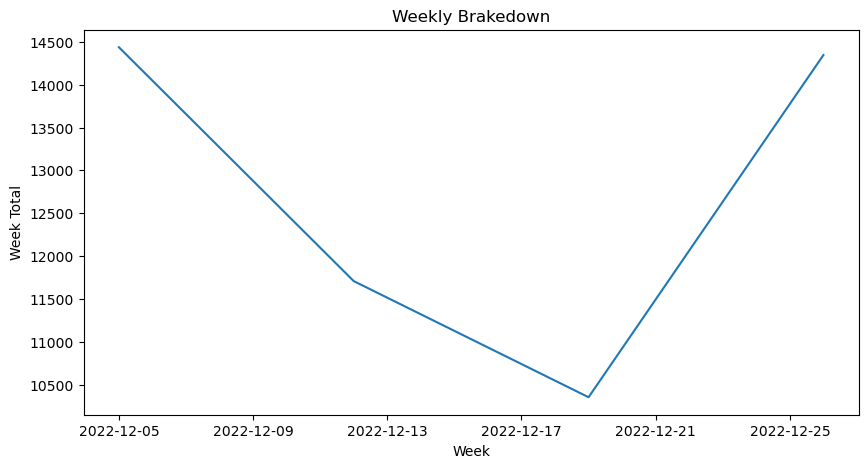

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(weekly_liora['Week'],weekly_liora['Week Total'])
plt.xlabel('Week')
plt.ylabel('Week Total')
plt.title("Weekly Brakedown")
plt.show()

In [ ]:
#call the difference on the sales columns to make the slaes data stationery
weekly_liora['sales_diff'] = weekly_liora['Week Total'].diff()
weekly_liora = weekly_liora.dropna()
weekly_liora.head()

,Week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Week Total,sales_diff
2,2022-12-19,0.0,0.0,2072.00,2598.60,2566.20,3012.10,103.0,10351.90,-1355.27
3,2022-12-26,0.0,0.0,2357.25,2522.23,3353.35,6113.15,0.0,14345.98,3994.08


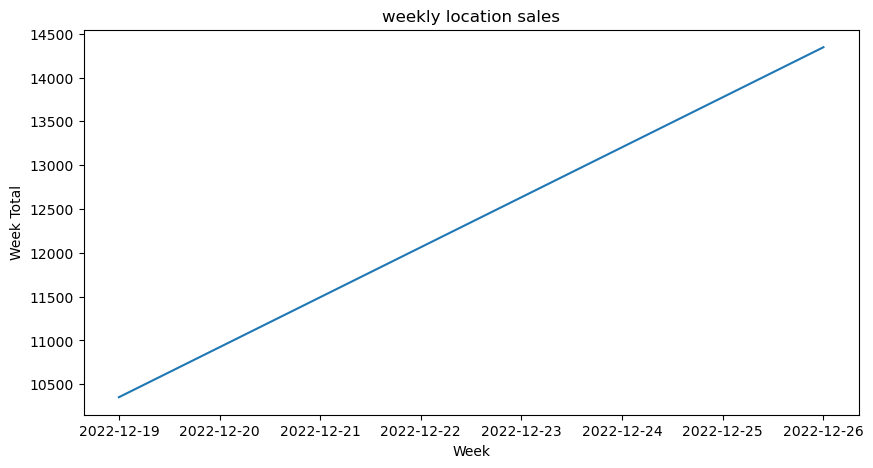

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(weekly_liora['Week'],weekly_liora['Week Total'])
plt.xlabel("Week")
plt.ylabel("Week Total")
plt.title("weekly location sales")
plt.show()